In [13]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
df = pd.read_csv("student-mat.csv")
df["Alc"] = (df["Walc"] + df["Dalc"]).div(2).round().astype(int)

In [8]:
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,4
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,4
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,4


In [9]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Alc'],
      dtype='object')

Correlation Heatmap showing how various factors impact daily and weekend alcohol consumption.

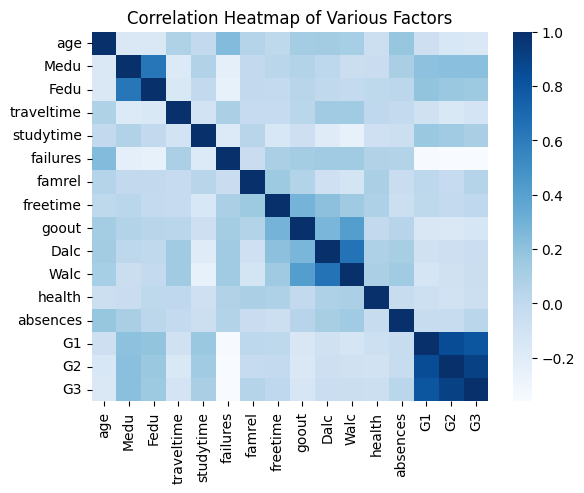

In [24]:
#Set up the heatmap with default method, only having numbers, and the color of the map based on shades of blue
dataplot = sns.heatmap(df.corr(method='pearson',numeric_only = True),cmap = "Blues")
#Set the title of the heatmap:
dataplot.set_title("Correlation Heatmap of Various Factors")
#display heatmap
plt.show()

Here, the Correlation Heatmap shows that some factors are not related or are loosely related to factors like Dalc and Walc, but other factors like goout are more significant.

Function that plots out percentage distribution of alcohol consumption based on a column specified:

In [25]:
def percentages_consumption_by_attribute(df, attribute):
    dalc_counts = df.groupby([attribute, 'Dalc']).size()
    walc_counts = df.groupby([attribute, 'Walc']).size()
    consumption_totals = df.groupby([attribute]).size()
    
    percentages_dalc = dalc_counts / consumption_totals * 100
    percentages_walc = walc_counts / consumption_totals * 100

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a grid of 1 row and 2 columns
    
    # Plot workday consumption
    percentages_dalc.unstack().plot(kind="bar", stacked=True, ax=axes[0])
    axes[0].set_xlabel(attribute)
    axes[0].set_ylabel('Percentage of students')
    axes[0].set_yticks(range(0, 101, 10))
    axes[0].set_title(f'Student Workday Consumption By: {attribute}')
    axes[0].legend(('Very Low', 'Low', 'Medium', 'High', 'Very High'), title = "Alcohol Consumption", loc='lower right')
    
    # Plot weekend consumption
    percentages_walc.unstack().plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_xlabel(attribute)
    axes[1].set_ylabel('Percentage of students')
    axes[1].set_yticks(range(0, 101, 10))
    axes[1].set_title(f'Student Weekend Consumption By: {attribute}')
    axes[1].legend(('Very Low', 'Low', 'Medium', 'High', 'Very High'), title = "Alcohol Consumption", loc='lower right')
    
    plt.tight_layout()
    plt.show()

Running it with some examples:

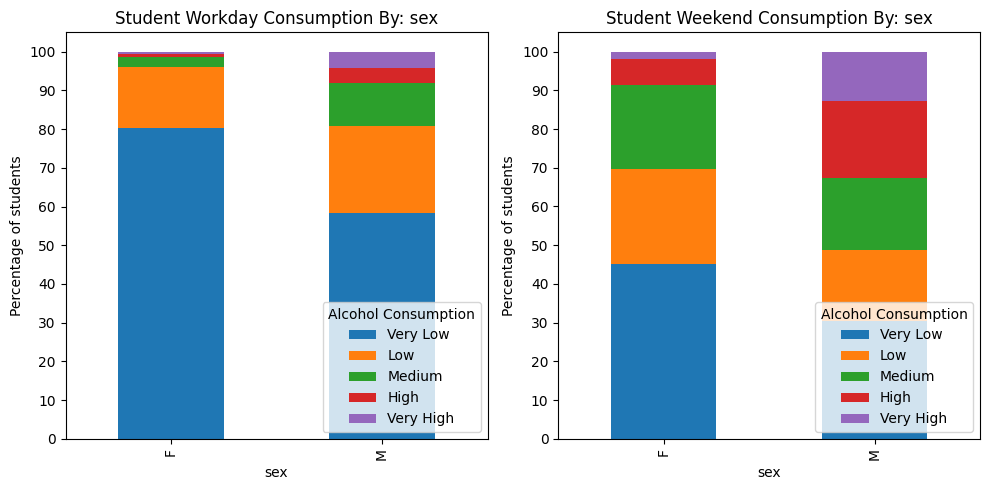

In [26]:
percentages_consumption_by_attribute(df, 'sex')

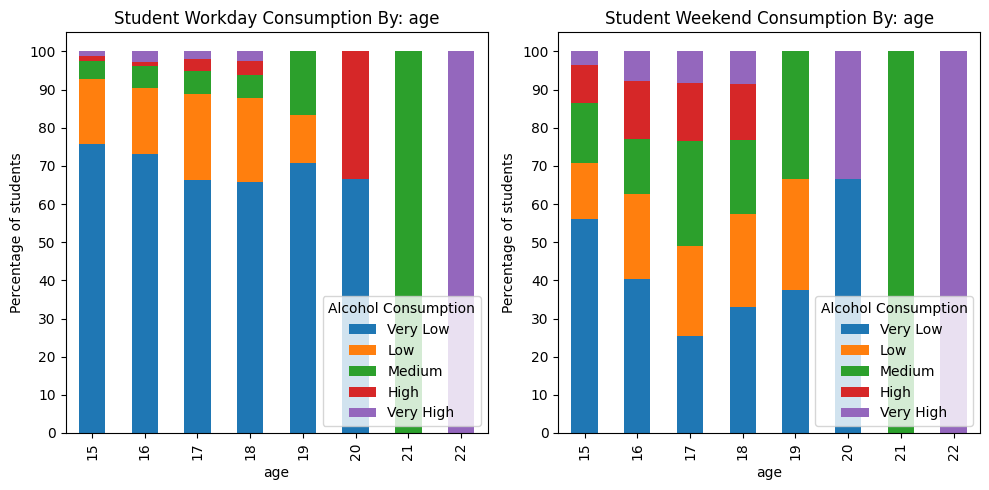

In [27]:
percentages_consumption_by_attribute(df, 'age')

That result shows that there's probably little data for ages > 19 and we should ignore it

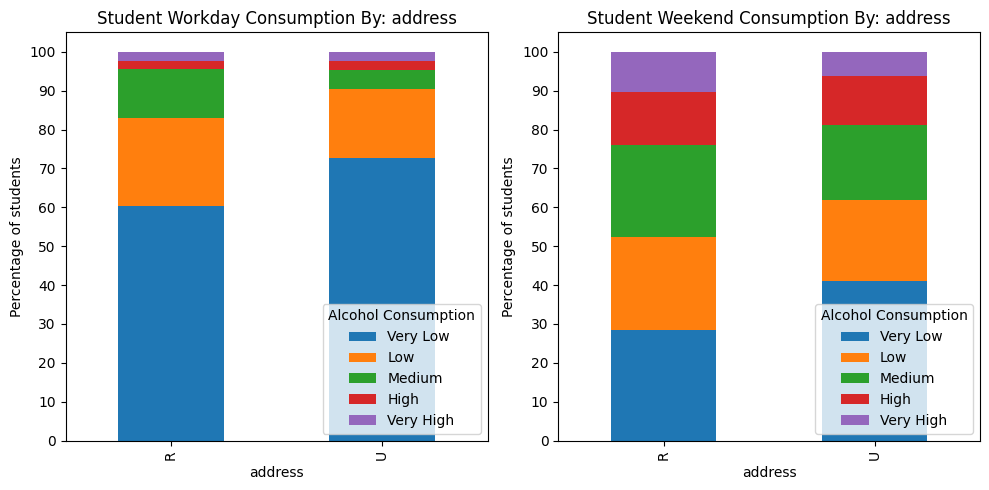

In [28]:
percentages_consumption_by_attribute(df, 'address')

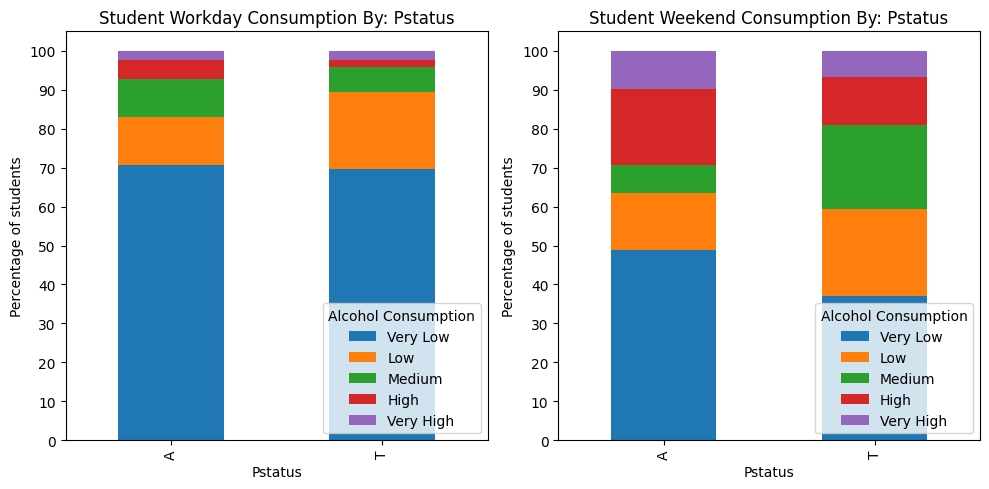

In [29]:
percentages_consumption_by_attribute(df, 'Pstatus')

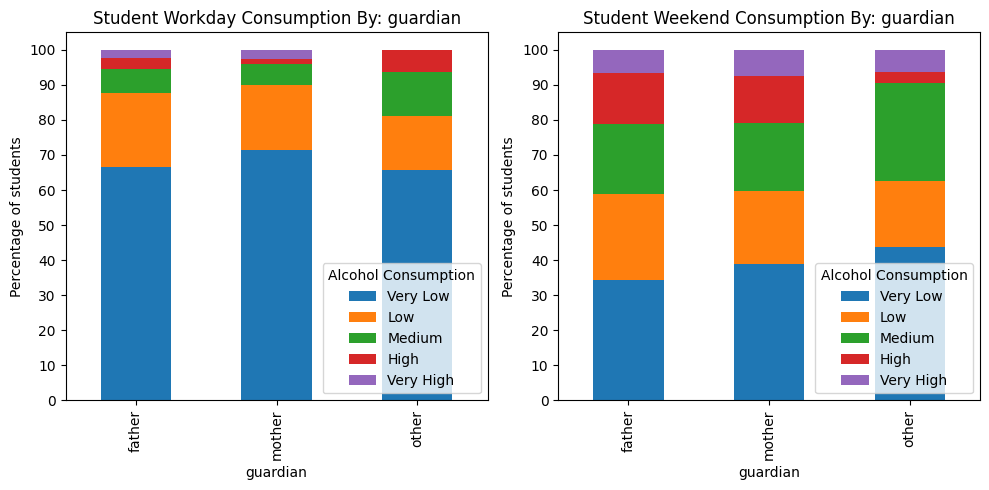

In [30]:
percentages_consumption_by_attribute(df, 'guardian')

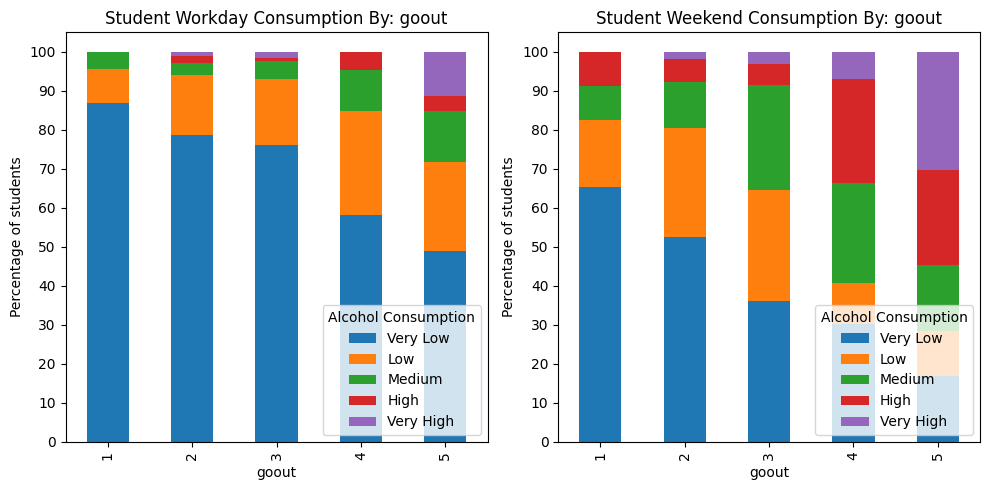

In [31]:
percentages_consumption_by_attribute(df, 'goout')

This graph shows that the more a student goes out, regardless of weekday or weekend, they have a higher alcohol consumption

In [32]:
def pieGraphOfConsumption(df, attribute):
    dalc_counts = df.groupby(df[attribute])["Dalc"].sum()
    walc_counts = df.groupby(df[attribute])['Walc'].sum()
   

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

    #ax1 is for dalc_counts
    ax1.pie(dalc_counts, labels = dalc_counts.index, radius = 1, autopct='%1.1f')
    #ax2 is for walc_counts
    ax2.pie(walc_counts, labels = walc_counts.index, radius = 1, autopct='%1.1f')
    ax1.set_title(f'Student Workday Consumption By {attribute}')
    ax2.set_title(f'Student Weekend Consumption By {attribute}')
    plt.tight_layout()
    plt.show()

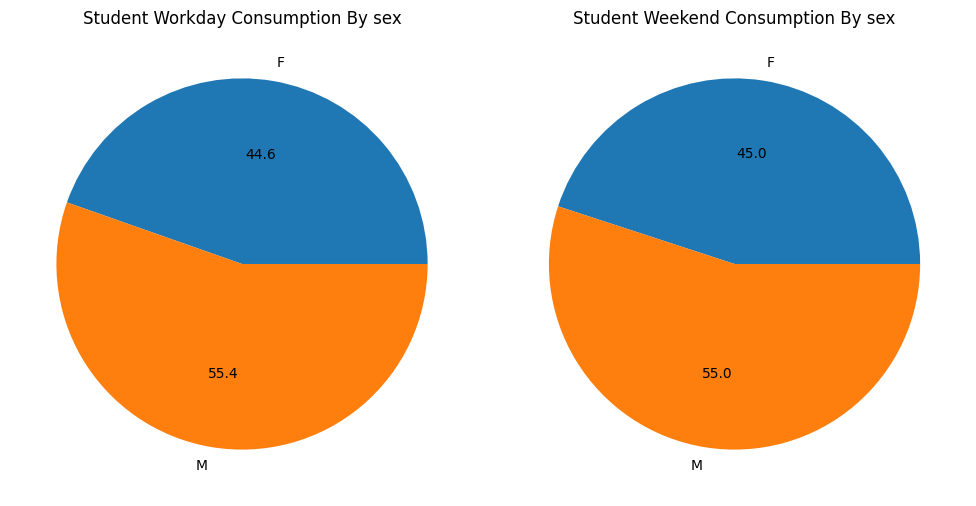

In [33]:
pieGraphOfConsumption(df, 'sex')

The Pie Graphs displays the composition of categories based on attributes. For example, the percentage of studnets who drink on the workday and weekend that are male or female are shown.

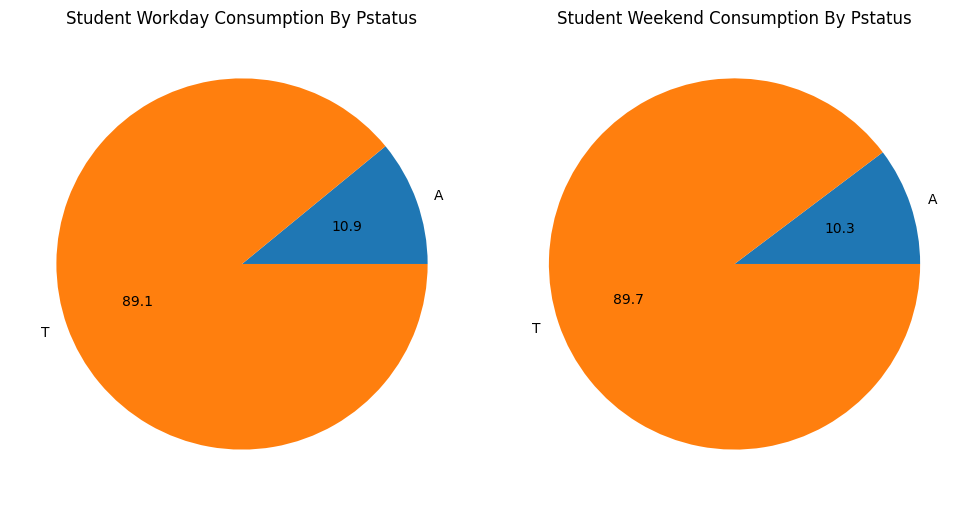

In [34]:
pieGraphOfConsumption(df, 'Pstatus')

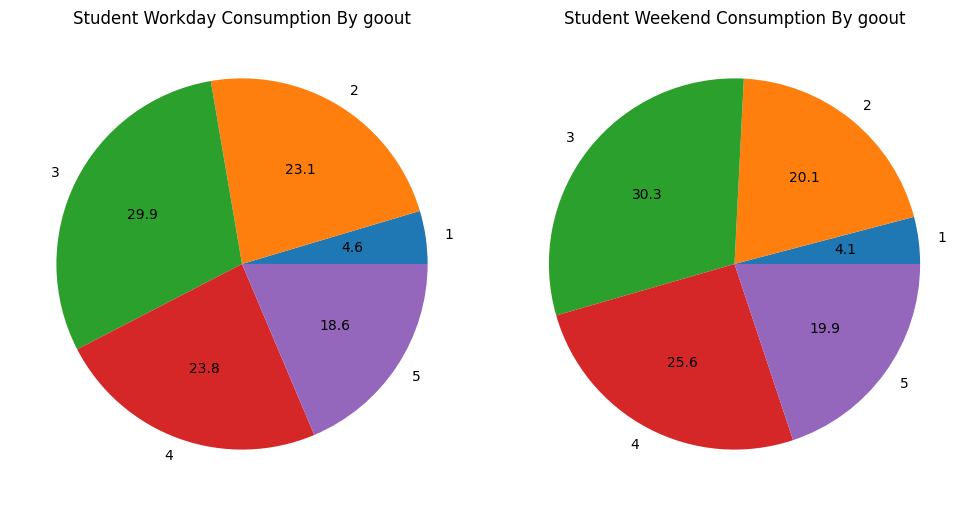

In [35]:
pieGraphOfConsumption(df, 'goout')

In [18]:
mldf = pd.read_csv("student-mat.csv")

mldf.drop(mldf.columns[32], axis=1, inplace = True)
mldf.drop(mldf.columns[31], axis=1, inplace = True)
mldf.drop(mldf.columns[30], axis=1, inplace = True)
mldf.drop(mldf.columns[28], axis=1, inplace = True)
mldf.drop(mldf.columns[24], axis=1, inplace = True)
mldf.drop(mldf.columns[22], axis=1, inplace = True)
mldf.drop(mldf.columns[21], axis=1, inplace = True)
mldf.drop(mldf.columns[19], axis=1, inplace = True)
mldf.drop(mldf.columns[18], axis=1, inplace = True)
mldf.drop(mldf.columns[17], axis=1, inplace = True)
mldf.drop(mldf.columns[12], axis=1, inplace = True)
mldf.drop(mldf.columns[10], axis=1, inplace = True)
mldf.drop(mldf.columns[4], axis=1, inplace = True)
mldf.drop(mldf.columns[3], axis=1, inplace = True)
mldf.drop(mldf.columns[0], axis=1, inplace = True)
#sex, age, pstatus, medu, fedu, mjob, fjob, guardian, studytime, failures, schoolsup
#famsup, higher, famrel, goout, dalc, walc, absences

mldf["Alc"] = (mldf["Walc"] + mldf["Dalc"]).div(2).round().astype(int)

mldf.drop(mldf.columns[15], axis=1, inplace = True)
mldf.drop(mldf.columns[15], axis=1, inplace = True)
print(mldf)

    sex  age Pstatus  Medu  Fedu      Mjob      Fjob guardian  studytime  \
0     F   18       A     4     4   at_home   teacher   mother          2   
1     F   17       T     1     1   at_home     other   father          2   
2     F   15       T     1     1   at_home     other   mother          2   
3     F   15       T     4     2    health  services   mother          3   
4     F   16       T     3     3     other     other   father          2   
..   ..  ...     ...   ...   ...       ...       ...      ...        ...   
390   M   20       A     2     2  services  services    other          2   
391   M   17       T     3     1  services  services   mother          1   
392   M   21       T     1     1     other     other    other          1   
393   M   18       T     3     2  services     other   mother          1   
394   M   19       T     1     1     other   at_home   father          1   

     failures schoolsup famsup higher  famrel  goout  absences  Alc  
0           0    

In [21]:


X = pd.get_dummies(df.drop('Alc', axis=1))
y = df['Alc']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate R^2 score (accuracy) of the model
r2 = r2_score(y_test, y_pred)
print('R^2 Score (Accuracy):', r2)

Mean Squared Error: 0.012946835443037968
R^2 Score (Accuracy): 0.9868058131939909
